<a href="https://colab.research.google.com/github/salmanarif86/MLAI/blob/master/TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
from contextlib import closing
from six import StringIO
from gym import utils
from gym.envs.toy_text import discrete
import numpy as np
from collections import defaultdict

In [0]:
>>> import gym
>>> env = gym.make('Taxi-v3')
>>> n_state = env.observation_space.n
>>> print(n_state)

500


In [0]:
>>> import torch

## start defining the epsilon-greedy policy. ##

In [0]:
>>> def gen_epsilon_greedy_policy(n_action, epsilon):
        def policy_function(state, Q):
            probs = torch.ones(n_action) * epsilon / n_action
            best_action = torch.argmax(Q[state]).item()
            probs[best_action] += 1.0 - epsilon
            action = torch.multinomial(probs, 1).item()
            return action
        return policy_function

##Now, we specify the number of episodes and initialize two variables used to track the length and total reward for each episode##

In [0]:
>>> n_episode = 1000
>>> length_episode = [0] * n_episode
>>> total_reward_episode = [0] * n_episode

## Now, define the function that performs Q-learning:##

In [0]:
>>> def q_learning(env, gamma, n_episode, alpha):
        n_action = env.action_space.n
        Q = defaultdict(lambda: torch.zeros(n_action))
        for episode in range(n_episode):
            state = env.reset()
            is_done = False
            while not is_done:
                action = epsilon_greedy_policy(state, Q)
                next_state, reward, is_done, info = env.step(action)
                td_delta = reward + gamma * torch.max(Q[next_state])- Q[state][action]
                Q[state][action] += alpha * td_delta
                if is_done:
                    break
                state = next_state
                policy = {}
        for state, actions in Q.items():
            policy[state] = torch.argmax(actions).item()
        return Q, policy

In [0]:
>>> def q_learning(env, gamma, n_episode, alpha):
        n_action = env.action_space.n
        Q = defaultdict(lambda: torch.zeros(n_action))
        for episode in range(n_episode):
            state = env.reset()
            is_done = False
            while not is_done:
                action = epsilon_greedy_policy(state, Q)
                next_state, reward, is_done, info = env.step(action)
                td_delta = reward + gamma * torch.max(Q[next_state])- Q[state][action]
                Q[state][action] += alpha * td_delta
                length_episode[episode] += 1
                total_reward_episode[episode] += reward
                if is_done:
                    break
                state = next_state
        policy = {}
        for state, actions in Q.items():
                policy[state] = torch.argmax(actions).item()
        return Q, policy

In [0]:
>>> gamma = 1
>>> alpha = 0.4
>>> epsilon = 0.1
>>> epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

In [0]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episode, alpha)

In [0]:
>>> print('The optimal policy:\n', optimal_policy)

The optimal policy:
 {192: 1, 172: 0, 152: 2, 92: 3, 72: 0, 52: 2, 292: 0, 272: 0, 252: 2, 232: 2, 212: 2, 312: 1, 392: 0, 372: 0, 352: 1, 332: 2, 132: 0, 112: 0, 32: 2, 12: 2, 412: 1, 492: 3, 472: 4, 476: 1, 496: 3, 376: 1, 396: 3, 296: 3, 227: 2, 207: 2, 247: 1, 107: 0, 127: 0, 7: 0, 27: 0, 307: 1, 327: 2, 347: 1, 267: 1, 147: 2, 167: 2, 47: 2, 67: 2, 427: 2, 447: 1, 407: 1, 287: 1, 187: 1, 87: 4, 99: 0, 367: 2, 387: 1, 343: 1, 323: 1, 423: 1, 443: 1, 243: 3, 223: 1, 203: 1, 303: 1, 263: 3, 143: 0, 163: 3, 43: 0, 63: 3, 123: 3, 103: 1, 23: 3, 3: 4, 19: 0, 39: 0, 119: 0, 139: 0, 283: 3, 183: 3, 83: 3, 363: 1, 383: 3, 483: 1, 181: 3, 161: 0, 141: 0, 41: 0, 61: 0, 81: 3, 281: 3, 261: 3, 241: 3, 221: 3, 201: 1, 381: 0, 361: 1, 341: 3, 321: 1, 121: 1, 21: 3, 1: 4, 17: 0, 101: 1, 301: 1, 481: 3, 461: 1, 294: 1, 274: 0, 254: 2, 234: 2, 214: 2, 394: 3, 374: 0, 194: 3, 174: 0, 74: 0, 54: 0, 94: 0, 154: 0, 354: 1, 454: 1, 434: 1, 334: 1, 134: 0, 114: 0, 14: 2, 34: 0, 314: 1, 414: 1, 291: 3, 27

In [0]:
optimal_Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>>,
            {0: tensor([0., 0., 0., 0., 0., 0.]),
             1: tensor([ 3.6487,  1.1200, -0.0219,  6.6321, 11.0000, -4.4368]),
             2: tensor([ 7.2835, -2.6746,  7.1883,  7.9354, 15.0000, -1.8633]),
             3: tensor([-0.2425, -5.6000, -2.2748, -5.6000, 10.0000, -2.4153]),
             4: tensor([ -8.4909,  -8.8000,  -8.5351,  -8.7232, -11.4893, -12.0000]),
             6: tensor([ -8.6478,  -8.8000,  -7.8283,  -8.8000, -11.9836, -12.0000]),
             7: tensor([ -2.1567,  -6.8000,  -6.8976,  -6.9440, -10.5920,  -9.9815]),
             8: tensor([  7.2225,  -4.8000,  -4.6688,  -4.8437,  -9.6000, -11.3332]),
             9: tensor([ -2.0210,  -7.6000,  -7.8195,  -7.6000, -11.2000,  -8.0000]),
             11: tensor([ -2.3136,  -7.5038,  -7.8733,  -7.7055, -10.4000,  -8.0000]),
             12: tensor([ -8.2410,  -8.0000,  -7.9720,  -8.1623, -11.3600,  -8.0000]),
             13: tensor([ -7.6425,  -8.0898,

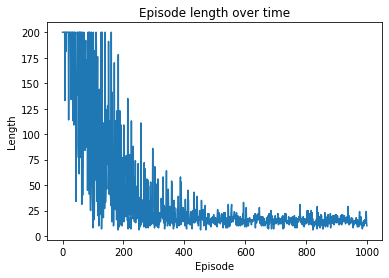

In [0]:
>>> import matplotlib.pyplot as plt
>>> plt.plot(length_episode)
>>> plt.title('Episode length over time')
>>> plt.xlabel('Episode')
>>> plt.ylabel('Length')
>>> plt.show()

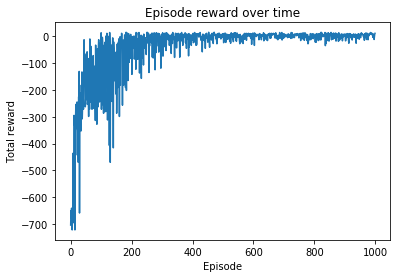

In [0]:
>>> plt.plot(total_reward_episode)
>>> plt.title('Episode reward over time')
>>> plt.xlabel('Episode')
>>> plt.ylabel('Total reward')
>>> plt.show()

SARSA

In [0]:
length_episode_SARSA = [0] * n_episode
total_reward_episode_SARSA = [0] * n_episode

In [0]:
from collections import defaultdict

def sarsa(env, gamma, n_episode, alpha):

     n_action = env.action_space.n
     Q = defaultdict(lambda: torch.zeros(n_action))
     for episode in range(n_episode):
         state = env.reset()
         is_done = False
         action = epsilon_greedy_policy(state, Q)
         while not is_done:
             next_state, reward, is_done, info  = env.step(action)
                                   
             next_action = epsilon_greedy_policy(next_state, Q)
             td_delta = reward + gamma * Q[next_state][next_action] - Q[state][action]
                                                
             Q[state][action] += alpha * td_delta
             length_episode_SARSA[episode] += 1
             total_reward_episode_SARSA[episode] += reward
             if is_done:
                 break
             state = next_state
             action = next_action
     policy = {}
     for state, actions in Q.items():
         policy[state] = torch.argmax(actions).item()
     return Q, policy

In [0]:
optimal_Q, optimal_policy = sarsa(env, gamma, n_episode, alpha)

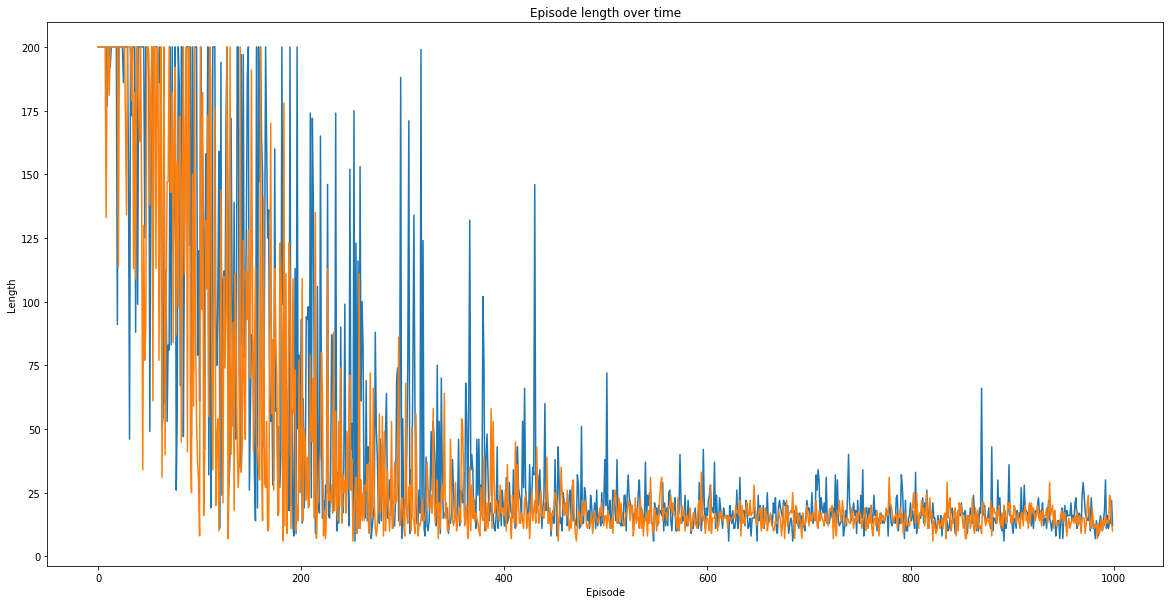

In [0]:
plt.figure(figsize=(20,10))
plt.plot(length_episode_SARSA)
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

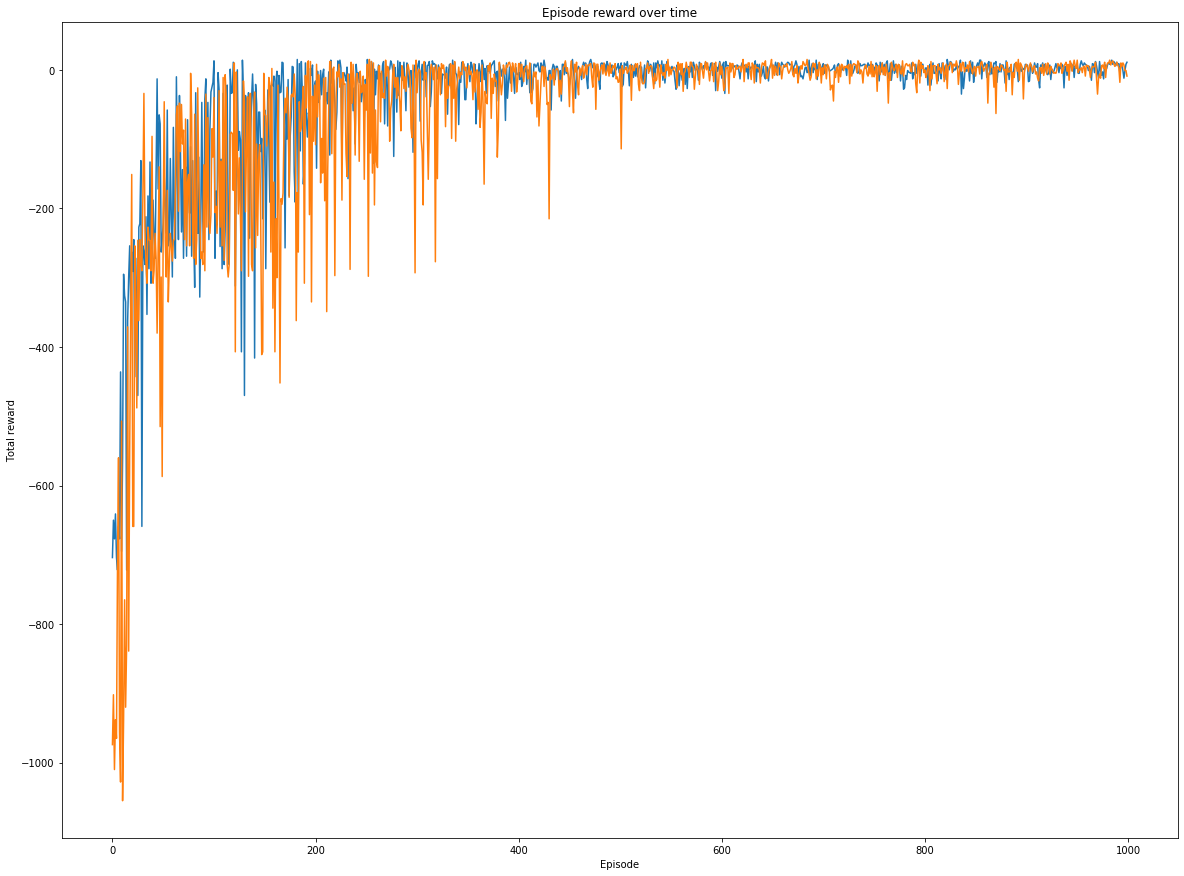

In [0]:
plt.figure(figsize=(20,15))
plt.plot(total_reward_episode)
plt.plot(total_reward_episode_SARSA)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import sys
sys.path.append('/content/smartbot/utils/')

In [61]:
!ls

adc.json  sample_data  smartbot


In [0]:
import gym
import itertools
from collections import defaultdict
import numpy as np
import sys
import time
from multiprocessing.pool import ThreadPool as Pool



from collections import defaultdict

from smartbot.utils import plotting

In [0]:
>>> import gym
>>> env = gym.make('Taxi-v3')


Episode 2000/2000. (0.0)Stats(episode_lengths=array([0., 0., 0., ..., 0., 0., 0.]), episode_rewards=array([-812., -776., -659., ...,    8.,    5.,    7.]))
Algorithm took 100.7249584197998 to execute


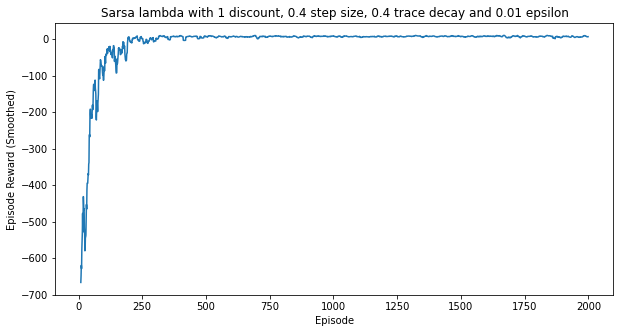

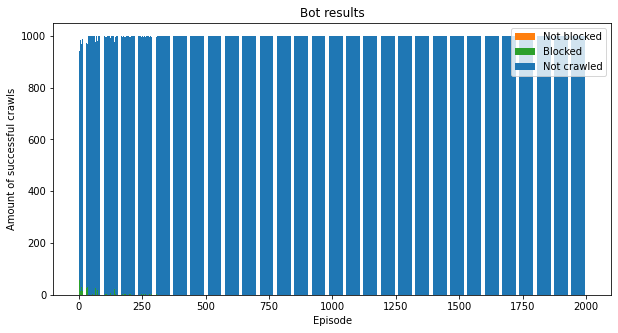

In [95]:
def make_epsilon_greedy_policy(Q, epsilon, nA):

    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn


def sarsa_lambda(env, num_episodes, discount= 1, alpha=0.4, trace_decay=0.4, epsilon=0.01, type='accumulate'):

    Q = defaultdict(lambda: np.zeros(env.nA))
    E = defaultdict(lambda: np.zeros(env.nA))

    policy = make_epsilon_greedy_policy(Q, epsilon, env.nA)

    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes)
    )

    botstats = plotting.BotStats(
        blocked=np.zeros(num_episodes),
        not_blocked=np.zeros(num_episodes)
    )
    rewards = [0.]

    for i_episode in range(num_episodes):

        print("\rEpisode {}/{}. ({})".format(i_episode+1, num_episodes, rewards[-1]), end="")
        sys.stdout.flush()

        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)

        for t in itertools.count():

            next_state, reward, done, _ = env.step(action)

            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)

            delta = reward + discount*Q[next_state][next_action] - Q[state][action]

            stats.episode_rewards[i_episode] += reward
            if reward < -1:
                botstats.blocked[i_episode] += 1
            elif reward >= 5:
                botstats.not_blocked[i_episode] += 1

            E[state][action] += 1

            for s, _ in Q.items():
                Q[s][:] += alpha * delta * E[s][:]
                if type == 'accumulate':
                    E[s][:] *= trace_decay * discount
                elif type == 'replace':
                    if s == state:
                        E[s][:] = 1
                    else:
                        E[s][:] *= discount * trace_decay

            if done:
                break

            state = next_state
            action = next_action
    title = "Sarsa lambda with {} discount, {} step size, {} trace decay and {} epsilon".format(discount, alpha, trace_decay, epsilon)
    return Q, stats,botstats, title


if __name__ == '__main__':
    start = time.time()
    Q, stats, botstats, title = sarsa_lambda(env, 2000)
    print(stats)
    end = time.time()
    print("Algorithm took {} to execute".format(end-start))
    plotting.plot_episode_stats(stats, title=title)
    plotting.plot_bot_stats(botstats)


In [73]:
type(stats)

smartbot.utils.plotting.Stats

In [0]:
for r in stats.episode_rewards:
  print (r)